In [10]:
import cv2
import numpy as np
from keras_squeezenet import SqueezeNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import *
from tensorflow.keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import os
from tensorflow.python.keras.utils import np_utils
#import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
%matplotlib inline

ImportError: this version of pandas is incompatible with numpy < 1.15.4
your numpy version is 1.14.5.
Please upgrade numpy to >= 1.15.4 to use this pandas version

In [3]:
my_data_dir='C:\\Users\\Jayandran\\Desktop\\Image_hand_cricket\\image_data'

Defining the data paths

In [4]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

# Class Map for mapping the categories

In [5]:
CLASS_MAP = {
    "none": 0,
    "one": 1,
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6
}

In [6]:
IMG_SAVE_PATH = 'image_data'

In [7]:
NUM_CLASSES = len(CLASS_MAP)

In [8]:
def mapper(val):
    return CLASS_MAP[val]

# Building The model by making the squuezent model on top of a Conv2d

In [9]:
def get_model():
    model = Sequential([
        SqueezeNet(input_shape=(220, 210, 3), include_top=False),
        Dropout(0.5),
        Convolution2D(NUM_CLASSES, (1, 1), padding='valid'),
        Activation('relu'),
        GlobalAveragePooling2D(),
        Activation('softmax')
    ])
    return model

# Load images from the  Train directory

In [10]:
dataset = []
for directory in os.listdir(IMG_SAVE_PATH+"\\train"):
    #print(directory)
    path = os.path.join(IMG_SAVE_PATH+"\\train", directory)
    #print(path)
    if not os.path.isdir(path):
        continue
    for item in os.listdir(path):
        # to make sure no hidden files get in our way
        if item.startswith("."):
            continue
        img = cv2.imread(os.path.join(path, item))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (210, 220))
        dataset.append([img, directory])


<br>
dataset = [<br>
    [[...], 'none'],<br>
    [[...], 'one'],<br>
    ...<br>
]<br>


In [11]:
data, labels = zip(*dataset)
labels = list(map(mapper, labels))


<br>
labels: one,two,two,three,four...<br>
one hot encoded: [1,0,0,0,0,0,0], [0,1,0,0,0,0,0], [0,1,0,0,0,0,0], [0,0,1,0,0,0,0], [1,0,0,0,0,0,0]...<br>


one hot encode the labels

In [12]:
labels = np_utils.to_categorical(labels)

# Load images from the  Test directory

In [13]:
dataset_test = []
for directory in os.listdir(IMG_SAVE_PATH+"\\test"):
    #print(directory)
    path = os.path.join(IMG_SAVE_PATH+"\\test", directory)
    #print(path)
    if not os.path.isdir(path):
        continue
    for item in os.listdir(path):
        # to make sure no hidden files get in our way
        if item.startswith("."):
            continue
        img = cv2.imread(os.path.join(path, item))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (210, 220))
        dataset_test.append([img, directory])

In [14]:
data_test, labels_test = zip(*dataset_test)
labels_test = list(map(mapper, labels_test))

In [15]:
labels_test = np_utils.to_categorical(labels_test)

In [16]:
val_data=(np.array(data_test), np.array(labels_test))

In [17]:
val_data[0][1002].shape

(220, 210, 3)

define the model

In [18]:
model = get_model()
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\Jayandran\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


start training

## Early Stopping

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [21]:
import warnings
warnings.filterwarnings('ignore')

## Training the Model

In [22]:
model.fit(np.array(data), np.array(labels), epochs=10,validation_data=val_data,batch_size=25, callbacks=[early_stop])

Epoch 1/10
112/112 [==============================] - 102s 877ms/step - loss: 0.5015 - accuracy: 0.8364 - val_loss: 0.1250 - val_accuracy: 0.9529
Epoch 2/10
112/112 [==============================] - 108s 968ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.1383 - val_accuracy: 0.9429
Epoch 3/10
112/112 [==============================] - 108s 969ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.1418 - val_accuracy: 0.9550


# Evaluating the Model


In [23]:
losses = pd.DataFrame(model.history.history)

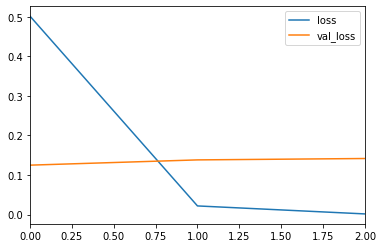

In [24]:
losses[['loss','val_loss']].plot()

# Saving the model

save the model for later use

In [25]:
#model.save("hand-cricket-model_3.h5")